In [73]:
from netCDF4 import Dataset, num2date
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
from pathlib import Path
import pandas as pd

In [74]:
path_corr = "DATA/GRACE/CLM4.SCALE_FACTOR.DS.G300KM.RL05.DSTvSCS1409.nc"
corr = Dataset(path_corr,mode='r')
corr

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.5
    Institution: JPL / GRACE-TELLUS
    Variable: scaling factor and measurement errors
    Platform: GRACE
    Sensor: GRACE
    Filter_Width_KM: 300
    DATE_CREATED: Wed Feb 19 15:04:06 2014
    dimensions(sizes): Longitude(360), Latitude(180)
    variables(dimensions): float32 Longitude(Longitude), float32 Latitude(Latitude), float32 SCALE_FACTOR(Latitude,Longitude), float32 MEASUREMENT_ERROR(Latitude,Longitude), float32 LEAKAGE_ERROR(Latitude,Longitude)
    groups: 

In [75]:
data_path = Path("DATA/GRACE/")
grace_data = list(data_path.glob("GRCTellus*"))
grace_data

[PosixPath('DATA/GRACE/GRCTellus.CSR.200204_201701.LND.RL05.DSTvSCS1409.nc'),
 PosixPath('DATA/GRACE/GRCTellus.GFZ.200204_201701.LND.RL05.DSTvSCS1409.nc'),
 PosixPath('DATA/GRACE/GRCTellus.JPL.200204_201701.LND.RL05_1.DSTvSCS1411.nc')]

In [76]:
nc = Dataset(grace_data[0], mode="r")


In [77]:
nc.variables.keys()

odict_keys(['lon', 'lat', 'time', 'lwe_thickness', 'time_bounds'])

In [78]:
lat_gleam = nc.variables['lat']
lon_gleam = nc.variables['lon']
time_gleam = nc.variables['time']
lwe_thickness_gleam = nc.variables['lwe_thickness']

In [79]:
lat_gleam, lat_gleam[:]

(<class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     units: degrees_north
     long_name: Latitude
 unlimited dimensions: 
 current shape = (180,)
 filling off,
 array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
        -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
        -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
        -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
        -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
        -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
        -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
        -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
        -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
         -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
          0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  

In [80]:
time_units_gleam = nc.variables['time'].units
print(time_units_gleam)

days since 2002-01-01 00:00:00


In [81]:
date_gleam = num2date(time_gleam[:], time_units_gleam)
date_gleam[:5]

array([datetime.datetime(2002, 4, 18, 12, 0),
       datetime.datetime(2002, 5, 11, 0, 0),
       datetime.datetime(2002, 8, 17, 0, 0),
       datetime.datetime(2002, 9, 16, 12, 0),
       datetime.datetime(2002, 10, 17, 0, 0)], dtype=object)

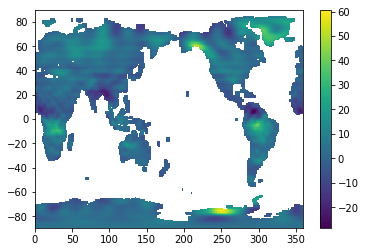

In [82]:

plt.pcolormesh(lon_gleam[:],lat_gleam[:], lwe_thickness_gleam[0])
plt.colorbar()
plt.show()

In [83]:
braz_lat= -15.9474753422
braz_long = 360 + -47.8778689831

In [84]:
def find_nearest(array, value,n=1):
    array = np.asarray(array)
    diff = np.abs(array - value)
    nearest = array[diff.argsort()][:n]
    idxs = []
    for i in range(n):
        idxs.append(np.where(array == nearest[i]))
    return np.sort(idxs)[::-1].flatten()

In [85]:
def make_mask(src,list_x,list_y):
    src = np.asarray(src)
    mask = np.full_like(src,False,dtype=bool)

    for x in list_x:
        for y in list_y:
            mask[x,y] = True
    return mask

In [86]:
list_x = find_nearest(lat_gleam,braz_lat,2)
list_y = find_nearest(lon_gleam,braz_long,2)

mask = make_mask(lwe_thickness_gleam[0],list_x,list_y)

In [87]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [88]:
lwe_thickness_gleam[0][:].filled()[mask]

array([6.3159766, 5.6334686, 7.1763625, 6.353309 ], dtype=float32)

In [89]:
def get_mean_mask(matrix, mask):
    mean = matrix[:][mask].mean()
    return mean

In [90]:
get_mean_mask(lwe_thickness_gleam[0],mask)

6.369779586791992

In [91]:
lista = []
for lwe_thickness in lwe_thickness_gleam:
    lista.append(get_mean_mask(lwe_thickness,mask))
    
lista

[6.369779586791992,
 -0.3171350061893463,
 -16.290027618408203,
 -19.481395721435547,
 -23.3328857421875,
 -19.722694396972656,
 -19.319786071777344,
 -2.4519946575164795,
 3.2500524520874023,
 4.753601551055908,
 8.16615104675293,
 2.8747546672821045,
 -12.343305587768555,
 -21.26107406616211,
 -25.042097091674805,
 -25.410423278808594,
 -22.118423461914062,
 -17.022846221923828,
 -12.087959289550781,
 13.138374328613281,
 19.025304794311523,
 19.05992889404297,
 12.624347686767578,
 4.322315216064453,
 -2.346790313720703,
 -7.248164176940918,
 -12.440788269042969,
 -16.736892700195312,
 -14.282514572143555,
 -6.511368751525879,
 2.972548246383667,
 10.705867767333984,
 16.172374725341797,
 14.142622947692871,
 6.196932315826416,
 -2.038717746734619,
 -7.774299621582031,
 -13.195343971252441,
 -16.669832229614258,
 -17.698579788208008,
 -14.963298797607422,
 3.783040761947632,
 10.491291999816895,
 8.602312088012695,
 16.376346588134766,
 22.83871078491211,
 11.744267463684082,
 4.765

In [92]:
def read_data(grace,lat,long,ns): 

    name = grace.as_posix()[21:24]
    
    nc = Dataset(grace, mode="r")
    
    lat_gleam = nc.variables['lat']
    lon_gleam = nc.variables['lon']
    time_gleam = nc.variables['time']
    lwe_thickness_gleam = nc.variables['lwe_thickness']
    
    time_units_gleam = nc.variables['time'].units
    
    date_gleam = num2date(time_gleam[:], time_units_gleam)
    
    dados = pd.DataFrame(index=date_gleam)
    

    for n in ns:
        name_column = name+"- %i" % n
        
        list_x = find_nearest(lat_gleam,lat,n)
        list_y = find_nearest(lon_gleam,long,n)

        mask = make_mask(lwe_thickness_gleam[0],list_x,list_y)
        column = []
        for lwe_thickness in lwe_thickness_gleam:
            column.append(get_mean_mask(lwe_thickness,mask))
        
        dados[name_column] = column
    
    
    return dados

In [93]:
dfs = []
for grace in grace_data:
    dfs.append(read_data(grace,braz_lat,braz_long,[2,3,4]))
df = pd.concat(dfs,sort=True)
df.sort_index(inplace=True)
df.head()

,CSR- 2,CSR- 3,CSR- 4,GFZ- 2,GFZ- 3,GFZ- 4,JPL- 2,JPL- 3,JPL- 4
2002-04-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.249933,3.097115,3.173393
2002-04-18 00:00:00,NaN,NaN,NaN,2.990696,3.248541,4.077078,NaN,NaN,NaN
2002-04-18 12:00:00,6.36978,6.862617,7.205875,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-4.259185,-3.519518,-3.788323
2002-05-10 12:00:00,NaN,NaN,NaN,-0.469174,-0.104986,0.065377,NaN,NaN,NaN


In [94]:
df = df.groupby(pd.Grouper(freq="M")).mean().dropna(how="all")

In [95]:
df.head()

,CSR- 2,CSR- 3,CSR- 4,GFZ- 2,GFZ- 3,GFZ- 4,JPL- 2,JPL- 3,JPL- 4
2002-04-30,6.369780,6.862617,7.205875,2.990696,3.248541,4.077078,2.249933,3.097115,3.173393
2002-05-31,-0.317135,-0.245743,0.190985,-0.469174,-0.104986,0.065377,-4.259185,-3.519518,-3.788323
2002-08-31,-16.290028,-15.536709,-15.985147,-14.353841,-13.973452,-14.237137,-16.737858,-16.217127,-16.430960
2002-09-30,-19.481396,-19.447235,-19.265459,-18.929935,-18.468894,-18.576111,-27.825027,-23.994564,-25.610378
2002-10-31,-23.332886,-22.280301,-22.933765,-23.638735,-22.075061,-22.915709,-23.753513,-22.982873,-23.265060


In [108]:
def get_df(graces,station):
    dfs = []
    lat = station["lat"]
    long = station["long"]
    for grace in grace_data:
        dfs.append(read_data(grace,lat,long,[2,3,4]))
    df = pd.concat(dfs,sort=True)
    df = df.groupby(pd.Grouper(freq="M")).mean().dropna(how="all")
    file_name = "DATA/GRACE/STATIONS/" + station.name + ".csv"
    df.to_csv(file_name,index_label="DATE")


In [109]:
station = pd.Series({"lat":braz_lat,
                    "long":braz_long},name="BRAZ")
station["lat"]

-15.9474753422

In [110]:
get_df(grace_data,station)
pd.read_csv("DATA/GRACE/STATIONS/BRAZ.csv")

,DATE,CSR- 2,CSR- 3,CSR- 4,GFZ- 2,GFZ- 3,GFZ- 4,JPL- 2,JPL- 3,JPL- 4
0,2002-04-30,6.369780,6.862617,7.205875,2.990696,3.248541,4.077078,2.249933,3.097115,3.173393
1,2002-05-31,-0.317135,-0.245743,0.190985,-0.469174,-0.104986,0.065377,-4.259185,-3.519518,-3.788323
2,2002-08-31,-16.290028,-15.536709,-15.985147,-14.353841,-13.973452,-14.237137,-16.737858,-16.217127,-16.430960
3,2002-09-30,-19.481396,-19.447235,-19.265459,-18.929935,-18.468894,-18.576111,-27.825027,-23.994564,-25.610378
4,2002-10-31,-23.332886,-22.280301,-22.933765,-23.638735,-22.075061,-22.915709,-23.753513,-22.982873,-23.265060
5,2002-11-30,-19.722694,-18.801866,-19.537502,-20.341890,-19.304660,-20.110733,-18.874060,-17.631137,-18.579494
6,2002-12-31,-19.319786,-18.601535,-18.338511,-18.110817,-17.494361,-17.541786,-21.428724,-19.742789,-20.003414
7,2003-01-31,-2.451995,-2.122681,-2.668819,-4.548550,-4.295708,-4.480847,-4.093900,-3.792067,-4.139344
8,2003-02-28,3.250052,2.994657,4.097945,2.072590,1.254594,2.824111,4.647142,4.434167,5.562096
9,2003-03-31,4.753602,4.324463,5.818776,5.661065,5.361503,6.813591,4.820865,4.704756,5.890776


In [111]:
stations = pd.read_csv("DATA/RBMC_2017.csv",index_col="Name")
stations.long = 360 + stations.long 


In [112]:
for station in stations.index:
    #print(station)
    get_df(grace_data,stations.loc[station])

ALAR
ALMA
AMBC
AMCO
AMHA
AMMU
AMPR
AMTA
AMTE
AMUA
APLJ
APS1
BABJ
BABR
BAIL
BAIR
BAIT
BATF
BAVC
BELE
BEPA
BOAV
BRAZ
BRFT
CEEU
CEFE
CEFT
CESB
CHPI
COAM
CORU
CRAT
CRUZ
CUIB
EESC
GOGY
GOJA
GOUR
GVA1
IFSC
ILHA
IMBT
IMPZ
ITAI
ITAM
JAMG
MABA
MABB
MABS
MCL1
MGBH
MGIN
MGMC
MGMT
MGRP
MGUB
MGV1
MSAQ
MSCB
MSCG
MSDR
MSNV
MSPP
MTCN
MTCO
MTGA
MTJI
MTLA
MTLE
MTNX
MTSF
MTSR
NAUS
NEIA
ONRJ
PAAR
PAIT
PASM
PBCG
PBJP
PEAF
PEPE
PICR
PIFL
PISR
PITN
POAL
POLI
POVE
PPTE
PRCV
PRGU
PRMA
RECF
RIOB
RIOD
RJCG
RNMO
RNNA
RNPF
ROCD
ROGM
ROJI
ROSA
RSAL
RSCL
RSPE
RSPF
SAGA
SALU
SAVO
SCAQ
SCCH
SCFL
SCLA
SEAJ
SJRP
SJSP
SMAR
SPAR
SPBO
SPBP
SPC1
SPDR
SPFE
SPFR
SPJA
SPLI
SPPI
SPS1
SPTU
SSA1
TOGU
TOPL
UBA1
UBE1
UFPR
VICO
